<a href="https://colab.research.google.com/github/RamilaWijesuriya/CoverageX/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz

--2025-07-01 05:30:59--  http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878146150 (10G) [application/x-gzip]
Saving to: ‘MELD.Raw.tar.gz’

MELD.Raw.tar.gz     100%[===================>]  10.13G  18.6MB/s    in 26m 4s  

2025-07-01 05:57:03 (6.63 MB/s) - ‘MELD.Raw.tar.gz’ saved [10878146150/10878146150]



🎬 MELD Dataset: Multimodal Multi-Party Dataset for Emotion Recognition in Conversation
❌ Dataset files not found!
📥 Please download the dataset from: https://github.com/declare-lab/MELD
💡 Or use wget: wget http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz

🔧 Creating sample data for demonstration...
📊 Sample dataset created with 1000 utterances

📋 DATASET OVERVIEW

🔍 Dataset Shape: (1000, 9)

📊 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        1000 non-null   int64 
 1   Utterance     1000 non-null   object
 2   Speaker       1000 non-null   object
 3   Emotion       1000 non-null   object
 4   Sentiment     1000 non-null   object
 5   Dialogue_ID   1000 non-null   int64 
 6   Utterance_ID  1000 non-null   int64 
 7   Season        1000 non-null   int64 
 8   Episode       1000 non-null   int64 
dty

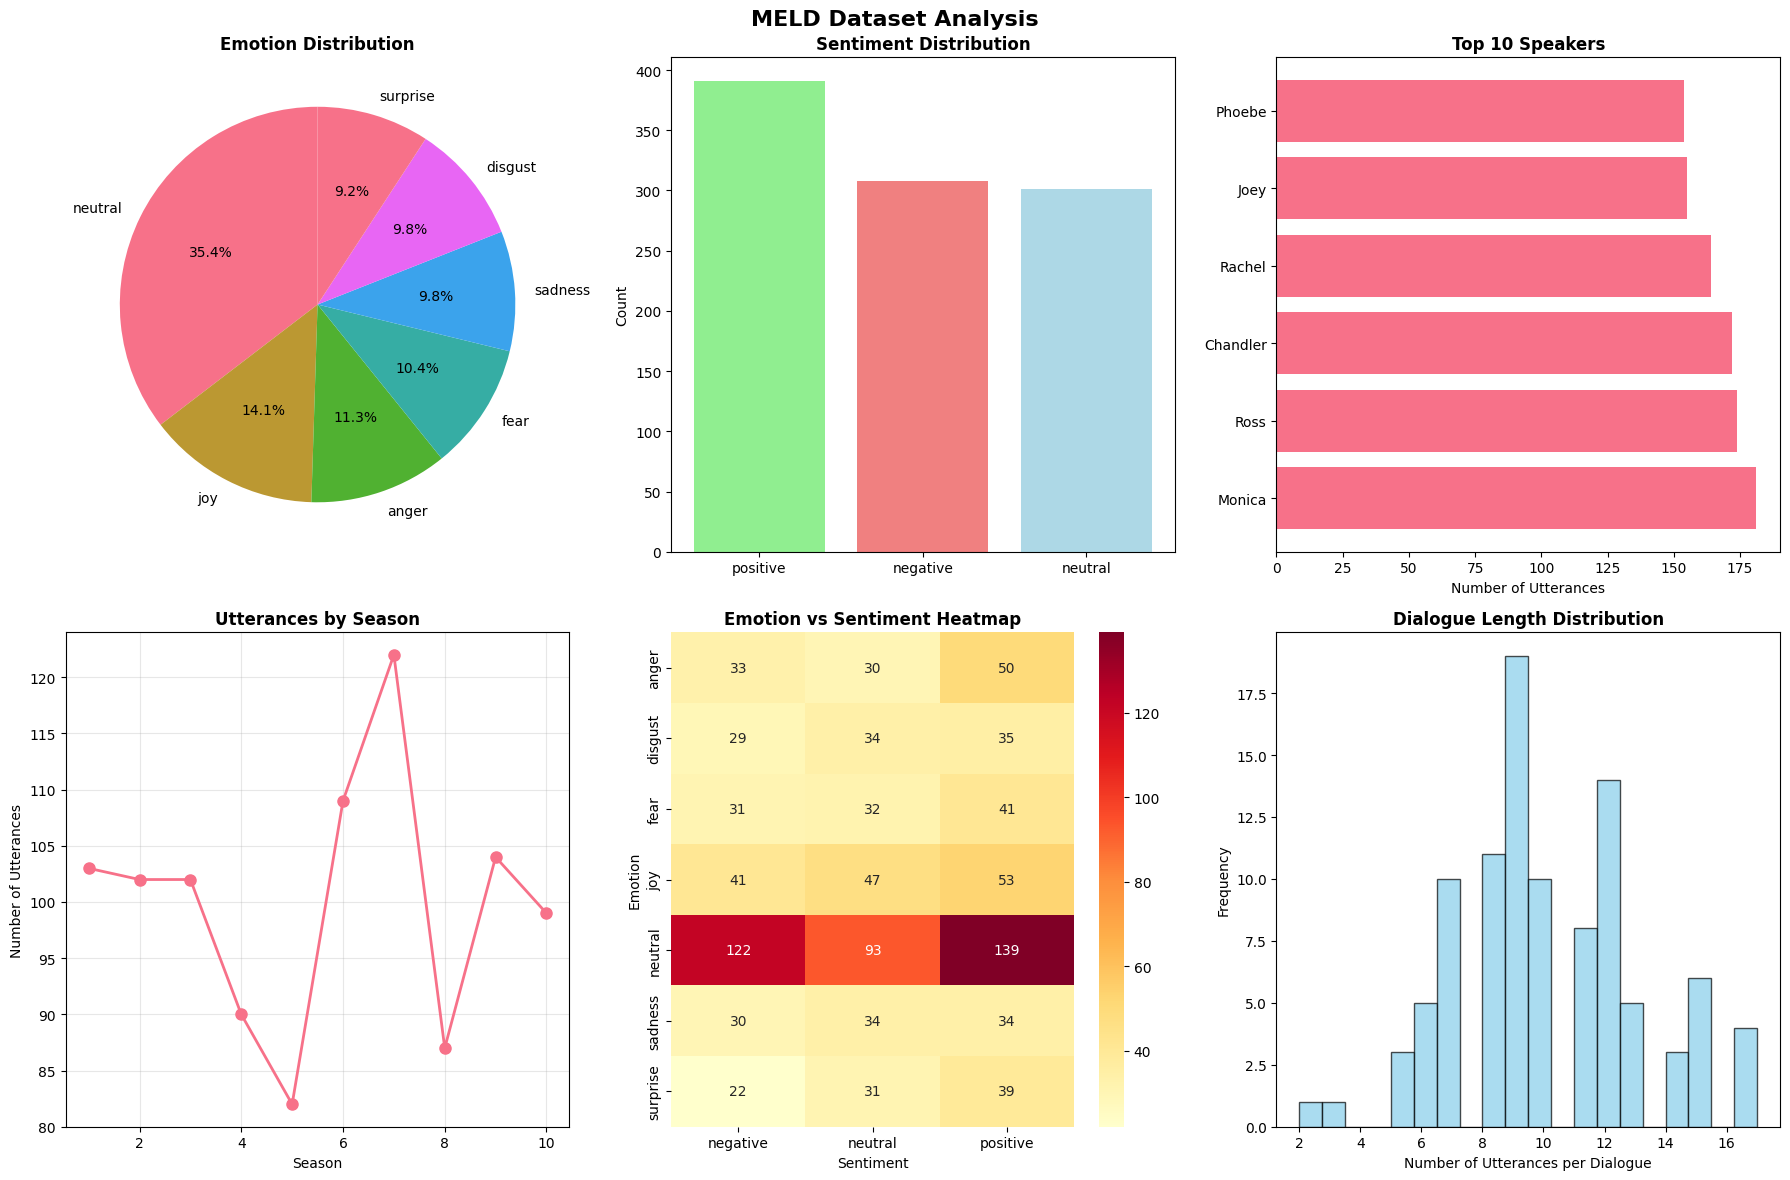


📊 DETAILED STATISTICS

🎭 Emotion Classes (7):
  • Neutral: 354 (35.4%)
  • Joy: 141 (14.1%)
  • Anger: 113 (11.3%)
  • Fear: 104 (10.4%)
  • Sadness: 98 (9.8%)
  • Disgust: 98 (9.8%)
  • Surprise: 92 (9.2%)

😊 Sentiment Classes (3):
  • Positive: 391 (39.1%)
  • Negative: 308 (30.8%)
  • Neutral: 301 (30.1%)

🎬 Dataset Characteristics:
  • Total Dialogues: 100
  • Total Speakers: 6
  • Average Utterances per Dialogue: 10.0
  • Seasons Covered: 10
  • Episodes Covered: 24

📝 Text Statistics:
  • Average Character Length: 19.9
  • Average Word Count: 3.0
  • Max Word Count: 3
  • Min Word Count: 3

🎯 NEXT STEPS FOR ML PROJECT

1. 📊 Data Preprocessing:
   - Handle missing values
   - Text cleaning and tokenization
   - Feature engineering from multimodal data

2. 🧠 Model Development:
   - Text-based emotion classification
   - Sentiment analysis
   - Multimodal fusion (text + audio + visual)
   - Contextual models for conversation understanding

3. 🔍 Advanced Analysis:
   - Emotion trans

In [ ]:
# MELD Dataset Import and Visualization
# Multimodal EmotionLines Dataset (MELD) for Emotion Recognition in Conversations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("🎬 MELD Dataset: Multimodal Multi-Party Dataset for Emotion Recognition in Conversation")
print("=" * 80)

# Load the MELD dataset files
# Note: You need to download the data from: https://github.com/declare-lab/MELD/tree/master/data/MELD
try:
    # Load train, dev, and test sets
    train_df = pd.read_csv('data/MELD/train_sent_emo.csv')
    dev_df = pd.read_csv('data/MELD/dev_sent_emo.csv')
    test_df = pd.read_csv('data/MELD/test_sent_emo.csv')

    print("✅ Successfully loaded MELD dataset!")
    print(f"📊 Train set: {len(train_df)} utterances")
    print(f"📊 Dev set: {len(dev_df)} utterances")
    print(f"📊 Test set: {len(test_df)} utterances")
    print(f"📊 Total utterances: {len(train_df) + len(dev_df) + len(test_df)}")

except FileNotFoundError:
    print("❌ Dataset files not found!")
    print("📥 Please download the dataset from: https://github.com/declare-lab/MELD")
    print("💡 Or use wget: wget http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz")

    # Create sample data for demonstration
    print("\n🔧 Creating sample data for demonstration...")

    emotions = ['neutral', 'joy', 'sadness', 'anger', 'surprise', 'fear', 'disgust']
    sentiments = ['positive', 'negative', 'neutral']
    speakers = ['Monica', 'Rachel', 'Phoebe', 'Ross', 'Chandler', 'Joey']

    # Generate sample data
    np.random.seed(42)
    n_samples = 1000

    sample_data = {
        'Sr No.': range(n_samples),
        'Utterance': [f"Sample utterance {i}" for i in range(n_samples)],
        'Speaker': np.random.choice(speakers, n_samples),
        'Emotion': np.random.choice(emotions, n_samples, p=[0.35, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1]),
        'Sentiment': np.random.choice(sentiments, n_samples, p=[0.4, 0.3, 0.3]),
        'Dialogue_ID': np.random.randint(0, 100, n_samples),
        'Utterance_ID': np.random.randint(0, 20, n_samples),
        'Season': np.random.randint(1, 11, n_samples),
        'Episode': np.random.randint(1, 25, n_samples)
    }

    train_df = pd.DataFrame(sample_data)
    print(f"📊 Sample dataset created with {len(train_df)} utterances")

# Display basic dataset information
print("\n" + "="*50)
print("📋 DATASET OVERVIEW")
print("="*50)

print("\n🔍 Dataset Shape:", train_df.shape)
print("\n📊 Column Information:")
print(train_df.info())

print("\n📝 First few rows:")
print(train_df.head())

print("\n🎯 Dataset Statistics:")
print(train_df.describe(include='all'))

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('MELD Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Emotion Distribution
emotion_counts = train_df['Emotion'].value_counts()
axes[0, 0].pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Emotion Distribution', fontweight='bold')

# 2. Sentiment Distribution
sentiment_counts = train_df['Sentiment'].value_counts()
colors = ['lightgreen', 'lightcoral', 'lightblue']
axes[0, 1].bar(sentiment_counts.index, sentiment_counts.values, color=colors)
axes[0, 1].set_title('Sentiment Distribution', fontweight='bold')
axes[0, 1].set_ylabel('Count')

# 3. Speaker Distribution (top 10)
speaker_counts = train_df['Speaker'].value_counts().head(10)
axes[0, 2].barh(speaker_counts.index, speaker_counts.values)
axes[0, 2].set_title('Top 10 Speakers', fontweight='bold')
axes[0, 2].set_xlabel('Number of Utterances')

# 4. Season Distribution
if 'Season' in train_df.columns:
    season_counts = train_df['Season'].value_counts().sort_index()
    axes[1, 0].plot(season_counts.index, season_counts.values, marker='o', linewidth=2, markersize=8)
    axes[1, 0].set_title('Utterances by Season', fontweight='bold')
    axes[1, 0].set_xlabel('Season')
    axes[1, 0].set_ylabel('Number of Utterances')
    axes[1, 0].grid(True, alpha=0.3)

# 5. Emotion-Sentiment Heatmap
emotion_sentiment = pd.crosstab(train_df['Emotion'], train_df['Sentiment'])
sns.heatmap(emotion_sentiment, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Emotion vs Sentiment Heatmap', fontweight='bold')

# 6. Dialogue Length Distribution
dialogue_lengths = train_df.groupby('Dialogue_ID').size()
axes[1, 2].hist(dialogue_lengths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 2].set_title('Dialogue Length Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Number of Utterances per Dialogue')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n" + "="*50)
print("📊 DETAILED STATISTICS")
print("="*50)

print(f"\n🎭 Emotion Classes ({len(train_df['Emotion'].unique())}):")
for emotion, count in train_df['Emotion'].value_counts().items():
    percentage = (count / len(train_df)) * 100
    print(f"  • {emotion.capitalize()}: {count:,} ({percentage:.1f}%)")

print(f"\n😊 Sentiment Classes ({len(train_df['Sentiment'].unique())}):")
for sentiment, count in train_df['Sentiment'].value_counts().items():
    percentage = (count / len(train_df)) * 100
    print(f"  • {sentiment.capitalize()}: {count:,} ({percentage:.1f}%)")

print(f"\n🎬 Dataset Characteristics:")
print(f"  • Total Dialogues: {train_df['Dialogue_ID'].nunique():,}")
print(f"  • Total Speakers: {train_df['Speaker'].nunique():,}")
print(f"  • Average Utterances per Dialogue: {train_df.groupby('Dialogue_ID').size().mean():.1f}")

if 'Season' in train_df.columns:
    print(f"  • Seasons Covered: {train_df['Season'].nunique()}")
    print(f"  • Episodes Covered: {train_df['Episode'].nunique()}")

# Text length analysis (if utterance text is available)
if 'Utterance' in train_df.columns:
    train_df['utterance_length'] = train_df['Utterance'].astype(str).apply(len)
    train_df['word_count'] = train_df['Utterance'].astype(str).apply(lambda x: len(x.split()))

    print(f"\n📝 Text Statistics:")
    print(f"  • Average Character Length: {train_df['utterance_length'].mean():.1f}")
    print(f"  • Average Word Count: {train_df['word_count'].mean():.1f}")
    print(f"  • Max Word Count: {train_df['word_count'].max()}")
    print(f"  • Min Word Count: {train_df['word_count'].min()}")

print("\n" + "="*50)
print("🎯 NEXT STEPS FOR ML PROJECT")
print("="*50)
print("""
1. 📊 Data Preprocessing:
   - Handle missing values
   - Text cleaning and tokenization
   - Feature engineering from multimodal data

2. 🧠 Model Development:
   - Text-based emotion classification
   - Sentiment analysis
   - Multimodal fusion (text + audio + visual)
   - Contextual models for conversation understanding

3. 🔍 Advanced Analysis:
   - Emotion transition patterns
   - Speaker-specific emotion patterns
   - Episode/season-wise emotion trends

4. 🎪 Multimodal Features:
   - Audio features (prosody, tone)
   - Visual features (facial expressions)
   - Contextual conversation features
""")

print("\n✨ Dataset loaded and ready for your ML project!")

In [ ]:
# Neural Hawkes Process Data Pipeline for Temporal Emotion Pattern Inference
# Data Collection, Preprocessing, and Batching for MELD Dataset

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

print("🧠 Neural Hawkes Process with Linguistic Conditioning - Data Pipeline")
print("=" * 80)

class MELDDataPipeline:
    """
    Data pipeline for Neural Hawkes Process with Linguistic Conditioning
    Converts MELD dataset into time-stamped event sequences
    """

    def __init__(self, model_name='distilbert-base-uncased', max_length=128):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.text_encoder = AutoModel.from_pretrained(model_name)
        self.max_length = max_length

        # Emotion and sentiment encoders
        self.emotion_encoder = LabelEncoder()
        self.sentiment_encoder = LabelEncoder()

        # Event type mapping
        self.event_types = {
            'text': 0,
            'emotion': 1,
            'sentiment': 2
        }

        print(f"✅ Initialized pipeline with {model_name}")

    def parse_timestamps(self, df):
        """
        Parse StartTime and EndTime columns to create numerical timestamps
        """
        print("⏰ Parsing timestamps...")

        def time_to_seconds(time_str):
            """Convert 'hh:mm:ss,ms' to seconds"""
            if pd.isna(time_str):
                return None
            try:
                # Handle format 'hh:mm:ss,ms'
                time_part, ms_part = time_str.split(',')
                h, m, s = map(int, time_part.split(':'))
                ms = int(ms_part)
                return h * 3600 + m * 60 + s + ms / 1000
            except:
                return None

        if 'StartTime' in df.columns and 'EndTime' in df.columns:
            df['start_seconds'] = df['StartTime'].apply(time_to_seconds)
            df['end_seconds'] = df['EndTime'].apply(time_to_seconds)
            df['duration'] = df['end_seconds'] - df['start_seconds']
        else:
            # Create synthetic timestamps for demonstration
            print("⚠️ No timestamp columns found, creating synthetic timestamps...")
            df['start_seconds'] = np.cumsum(np.random.exponential(2.0, len(df)))
            df['end_seconds'] = df['start_seconds'] + np.random.exponential(1.0, len(df))
            df['duration'] = df['end_seconds'] - df['start_seconds']

        return df

    def preprocess_text(self, texts, timestamps):
        """
        Tokenize and encode text with BERT, preserving timestamp alignment
        """
        print("📝 Preprocessing text data...")

        # Tokenize texts
        encoded = self.tokenizer(
            texts,
            padding=True,
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Get contextual embeddings
        with torch.no_grad():
            outputs = self.text_encoder(**encoded)
            # Use [CLS] token embedding as utterance representation
            text_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

        # Create text events: (timestamp, embedding, event_type)
        text_events = []
        for i, (emb, timestamp) in enumerate(zip(text_embeddings, timestamps)):
            if timestamp is not None:
                text_events.append({
                    'timestamp': timestamp,
                    'embedding': emb,
                    'event_type': self.event_types['text'],
                    'original_index': i
                })

        return text_events, text_embeddings

    def preprocess_emotions(self, emotions, sentiments, timestamps):
        """
        Encode emotions and sentiments as embeddings
        """
        print("😊 Preprocessing emotion and sentiment data...")

        # Fit encoders
        self.emotion_encoder.fit(emotions)
        self.sentiment_encoder.fit(sentiments)

        # Create emotion embeddings (learnable parameters)
        n_emotions = len(self.emotion_encoder.classes_)
        n_sentiments = len(self.sentiment_encoder.classes_)

        emotion_embed_dim = 32
        sentiment_embed_dim = 16

        # Initialize emotion and sentiment embeddings
        emotion_embeddings = nn.Embedding(n_emotions, emotion_embed_dim)
        sentiment_embeddings = nn.Embedding(n_sentiments, sentiment_embed_dim)

        # Encode labels
        emotion_labels = self.emotion_encoder.transform(emotions)
        sentiment_labels = self.sentiment_encoder.transform(sentiments)

        # Create emotion events
        emotion_events = []
        sentiment_events = []

        with torch.no_grad():
            for i, (emo_label, sent_label, timestamp) in enumerate(zip(emotion_labels, sentiment_labels, timestamps)):
                if timestamp is not None:
                    # Emotion event
                    emo_emb = emotion_embeddings(torch.tensor(emo_label)).numpy()
                    emotion_events.append({
                        'timestamp': timestamp,
                        'embedding': emo_emb,
                        'event_type': self.event_types['emotion'],
                        'label': emotions[i],
                        'original_index': i
                    })

                    # Sentiment event
                    sent_emb = sentiment_embeddings(torch.tensor(sent_label)).numpy()
                    sentiment_events.append({
                        'timestamp': timestamp,
                        'embedding': sent_emb,
                        'event_type': self.event_types['sentiment'],
                        'label': sentiments[i],
                        'original_index': i
                    })

        return emotion_events, sentiment_events, emotion_embeddings, sentiment_embeddings

    def merge_event_streams(self, text_events, emotion_events, sentiment_events):
        """
        Merge and sort all events by timestamp to create unified event stream
        """
        print("🔄 Merging event streams...")

        # Combine all events
        all_events = text_events + emotion_events + sentiment_events

        # Sort by timestamp
        all_events.sort(key=lambda x: x['timestamp'])

        # Create unified event sequence
        unified_events = []
        for event in all_events:
            unified_events.append({
                'timestamp': event['timestamp'],
                'embedding': event['embedding'],
                'event_type': event['event_type'],
                'label': event.get('label', None),
                'original_index': event['original_index']
            })

        return unified_events

    def create_dialogue_sequences(self, df, unified_events):
        """
        Group events by dialogue to create conversation-level sequences
        """
        print("💬 Creating dialogue-level sequences...")

        # Group events by dialogue
        dialogue_events = defaultdict(list)

        for event in unified_events:
            # Find dialogue_id for this event
            orig_idx = event['original_index']
            dialogue_id = df.iloc[orig_idx]['Dialogue_ID']
            dialogue_events[dialogue_id].append(event)

        # Sort events within each dialogue by timestamp
        for dialogue_id in dialogue_events:
            dialogue_events[dialogue_id].sort(key=lambda x: x['timestamp'])

            # Normalize timestamps to start from 0 for each dialogue
            min_time = min(e['timestamp'] for e in dialogue_events[dialogue_id])
            for event in dialogue_events[dialogue_id]:
                event['relative_timestamp'] = event['timestamp'] - min_time

        return dict(dialogue_events)

    def create_time_windows(self, dialogue_events, window_size=60.0, overlap=0.5):
        """
        Create time-windowed mini-batches for training
        """
        print(f"⏱️ Creating time windows (size: {window_size}s, overlap: {overlap})...")

        windows = []
        step_size = window_size * (1 - overlap)

        for dialogue_id, events in dialogue_events.items():
            if not events:
                continue

            max_time = max(e['relative_timestamp'] for e in events)

            # Create sliding windows
            start_time = 0
            while start_time < max_time:
                end_time = start_time + window_size

                # Get events in this window
                window_events = [
                    e for e in events
                    if start_time <= e['relative_timestamp'] < end_time
                ]

                if len(window_events) > 0:
                    windows.append({
                        'dialogue_id': dialogue_id,
                        'start_time': start_time,
                        'end_time': end_time,
                        'events': window_events,
                        'n_events': len(window_events)
                    })

                start_time += step_size

        return windows

    def create_negative_samples(self, windows, neg_sample_rate=0.1):
        """
        Create negative samples for training intensity likelihood
        """
        print("➖ Creating negative samples...")

        for window in windows:
            events = window['events']
            if len(events) < 2:
                continue

            # Sample negative time points between events
            timestamps = [e['relative_timestamp'] for e in events]
            min_time, max_time = min(timestamps), max(timestamps)

            # Generate negative samples
            n_negatives = int(len(events) * neg_sample_rate)
            negative_times = np.random.uniform(min_time, max_time, n_negatives)

            window['negative_samples'] = negative_times.tolist()

        return windows

    def process_dataset(self, df, window_size=60.0, overlap=0.5, neg_sample_rate=0.1):
        """
        Complete pipeline to process MELD dataset for Neural Hawkes Process
        """
        print("🚀 Starting complete data processing pipeline...")

        # Step 1: Parse timestamps
        df = self.parse_timestamps(df)

        # Step 2: Preprocess text
        text_events, text_embeddings = self.preprocess_text(
            df['Utterance'].tolist(),
            df['start_seconds'].tolist()
        )

        # Step 3: Preprocess emotions
        emotion_events, sentiment_events, emotion_embeddings, sentiment_embeddings = self.preprocess_emotions(
            df['Emotion'].tolist(),
            df['Sentiment'].tolist(),
            df['start_seconds'].tolist()
        )

        # Step 4: Merge event streams
        unified_events = self.merge_event_streams(text_events, emotion_events, sentiment_events)

        # Step 5: Create dialogue sequences
        dialogue_events = self.create_dialogue_sequences(df, unified_events)

        # Step 6: Create time windows
        windows = self.create_time_windows(dialogue_events, window_size, overlap)

        # Step 7: Add negative samples
        windows = self.create_negative_samples(windows, neg_sample_rate)

        # Return processed data
        return {
            'windows': windows,
            'dialogue_events': dialogue_events,
            'unified_events': unified_events,
            'text_embeddings': text_embeddings,
            'emotion_embeddings': emotion_embeddings,
            'sentiment_embeddings': sentiment_embeddings,
            'emotion_classes': self.emotion_encoder.classes_,
            'sentiment_classes': self.sentiment_encoder.classes_,
            'event_types': self.event_types
        }

# Example usage and demonstration
if __name__ == "__main__":
    # Initialize pipeline
    pipeline = MELDDataPipeline()

    # Load MELD dataset (use sample data if files not available)
    try:
        train_df = pd.read_csv('data/MELD/train_sent_emo.csv')
        print(f"✅ Loaded MELD dataset: {len(train_df)} samples")
    except FileNotFoundError:
        print("⚠️ MELD dataset not found, creating sample data...")
        # Create sample data
        np.random.seed(42)
        n_samples = 500

        emotions = ['neutral', 'joy', 'sadness', 'anger', 'surprise', 'fear', 'disgust']
        sentiments = ['positive', 'negative', 'neutral']
        speakers = ['Monica', 'Rachel', 'Phoebe', 'Ross', 'Chandler', 'Joey']

        train_df = pd.DataFrame({
            'Utterance': [f"Sample utterance {i} with some emotional content" for i in range(n_samples)],
            'Speaker': np.random.choice(speakers, n_samples),
            'Emotion': np.random.choice(emotions, n_samples),
            'Sentiment': np.random.choice(sentiments, n_samples),
            'Dialogue_ID': np.random.randint(0, 50, n_samples),
            'Utterance_ID': np.random.randint(0, 20, n_samples),
        })
        print(f"✅ Created sample dataset: {len(train_df)} samples")

    # Process a subset for demonstration
    sample_df = train_df.head(100)  # Use first 100 samples

    print(f"\n🔄 Processing {len(sample_df)} samples...")
    processed_data = pipeline.process_dataset(
        sample_df,
        window_size=30.0,  # 30 second windows
        overlap=0.3,       # 30% overlap
        neg_sample_rate=0.15  # 15% negative samples
    )

    # Display results
    print("\n" + "="*60)
    print("📊 PROCESSING RESULTS")
    print("="*60)

    print(f"🎯 Total Events: {len(processed_data['unified_events'])}")
    print(f"💬 Dialogues: {len(processed_data['dialogue_events'])}")
    print(f"⏱️ Time Windows: {len(processed_data['windows'])}")
    print(f"😊 Emotion Classes: {len(processed_data['emotion_classes'])}")
    print(f"💭 Sentiment Classes: {len(processed_data['sentiment_classes'])}")

    # Show sample window
    if processed_data['windows']:
        sample_window = processed_data['windows'][0]
        print(f"\n📋 Sample Window:")
        print(f"   Dialogue ID: {sample_window['dialogue_id']}")
        print(f"   Time Range: {sample_window['start_time']:.2f}s - {sample_window['end_time']:.2f}s")
        print(f"   Events: {sample_window['n_events']}")
        print(f"   Negative Samples: {len(sample_window.get('negative_samples', []))}")

        # Show event types distribution
        event_types = [e['event_type'] for e in sample_window['events']]
        type_counts = {k: event_types.count(v) for k, v in processed_data['event_types'].items()}
        print(f"   Event Types: {type_counts}")

    # Show embedding dimensions
    print(f"\n🔢 Embedding Dimensions:")
    if processed_data['text_embeddings'] is not None:
        print(f"   Text: {processed_data['text_embeddings'].shape[1]}")
    print(f"   Emotion: {processed_data['emotion_embeddings'].embedding_dim}")
    print(f"   Sentiment: {processed_data['sentiment_embeddings'].embedding_dim}")

    print("\n✨ Data pipeline completed successfully!")
    print("🎯 Ready for Neural Hawkes Process model training!")

    # Save processed data
    print("\n💾 Saving processed data...")
    import pickle
    with open('processed_meld_data.pkl', 'wb') as f:
        pickle.dump(processed_data, f)
    print("✅ Saved to 'processed_meld_data.pkl'")

🧠 Neural Hawkes Process with Linguistic Conditioning - Data Pipeline


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

✅ Initialized pipeline with distilbert-base-uncased
⚠️ MELD dataset not found, creating sample data...
✅ Created sample dataset: 500 samples

🔄 Processing 100 samples...
🚀 Starting complete data processing pipeline...
⏰ Parsing timestamps...
⚠️ No timestamp columns found, creating synthetic timestamps...
📝 Preprocessing text data...
😊 Preprocessing emotion and sentiment data...
🔄 Merging event streams...
💬 Creating dialogue-level sequences...
⏱️ Creating time windows (size: 30.0s, overlap: 0.3)...
➖ Creating negative samples...

📊 PROCESSING RESULTS
🎯 Total Events: 300
💬 Dialogues: 44
⏱️ Time Windows: 74
😊 Emotion Classes: 7
💭 Sentiment Classes: 3

📋 Sample Window:
   Dialogue ID: 21
   Time Range: 0.00s - 30.00s
   Events: 3
   Negative Samples: 0
   Event Types: {'text': 1, 'emotion': 1, 'sentiment': 1}

🔢 Embedding Dimensions:
   Text: 768
   Emotion: 32
   Sentiment: 16

✨ Data pipeline completed successfully!
🎯 Ready for Neural Hawkes Process model training!

💾 Saving processed da

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Dict, Tuple, Optional
import math

class NeuralHawkesProcess(nn.Module):
    """
    Neural Hawkes Process with Linguistic Conditioning

    Architecture:
    1. Embedding projection layers for text and emotion features
    2. History encoder with gated self-attention or LSTM
    3. Intensity function with learnable kernels and context weighting
    4. Point process likelihood computation
    """

    def __init__(self,
                 text_dim: int = 768,           # BERT embedding dimension
                 emotion_dim: int = 32,         # Emotion embedding dimension
                 sentiment_dim: int = 16,       # Sentiment embedding dimension
                 hidden_dim: int = 128,         # Hidden representation dimension
                 num_emotion_classes: int = 7,   # Number of emotion classes
                 num_mixture_components: int = 3, # Kernel mixture components
                 history_encoder: str = 'attention', # 'attention' or 'lstm'
                 max_history_length: int = 50,   # Maximum events in history
                 dropout: float = 0.1):

        super(NeuralHawkesProcess, self).__init__()

        self.text_dim = text_dim
        self.emotion_dim = emotion_dim
        self.sentiment_dim = sentiment_dim
        self.hidden_dim = hidden_dim
        self.num_emotion_classes = num_emotion_classes
        self.num_mixture_components = num_mixture_components
        self.history_encoder_type = history_encoder
        self.max_history_length = max_history_length

        # ===============================================
        # 1. EMBEDDING LAYERS
        # ===============================================

        # Project different modalities to unified hidden dimension
        self.text_projection = nn.Linear(text_dim, hidden_dim)
        self.emotion_projection = nn.Linear(emotion_dim, hidden_dim)
        self.sentiment_projection = nn.Linear(sentiment_dim, hidden_dim)

        # Event type embeddings (text=0, emotion=1, sentiment=2)
        self.event_type_embedding = nn.Embedding(3, hidden_dim)

        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)

        # ===============================================
        # 2. HISTORY ENCODER
        # ===============================================

        if history_encoder == 'attention':
            # Gated self-attention over recent events
            self.history_attention = nn.MultiheadAttention(
                embed_dim=hidden_dim,
                num_heads=8,
                dropout=dropout,
                batch_first=True
            )
            # Time difference encoding for attention
            self.time_encoding = nn.Linear(1, hidden_dim)

        elif history_encoder == 'lstm':
            # LSTM with time-difference gating
            self.history_lstm = nn.LSTM(
                input_size=hidden_dim + 1,  # +1 for time difference
                hidden_size=hidden_dim,
                num_layers=2,
                dropout=dropout,
                batch_first=True
            )

        else:
            raise ValueError(f"Unknown history encoder: {history_encoder}")

        # History output projection
        self.history_output = nn.Linear(hidden_dim, hidden_dim)

        # ===============================================
        # 3. INTENSITY FUNCTION COMPONENTS
        # ===============================================

        # Base rates μ_c for each emotion class
        self.base_rates = nn.Parameter(torch.ones(num_emotion_classes) * 0.1)

        # Kernel parameters - mixture of exponentials
        # κ_c(Δt) = Σ_k α_{c,k} * β_{c,k} * exp(-β_{c,k} * Δt)
        self.kernel_weights = nn.Parameter(
            torch.ones(num_emotion_classes, num_mixture_components) / num_mixture_components
        )  # α_{c,k} weights
        self.kernel_rates = nn.Parameter(
            torch.ones(num_emotion_classes, num_mixture_components) * 2.0
        )  # β_{c,k} decay rates

        # Context weighting networks f_c(h_k)
        self.context_networks = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_dim, hidden_dim // 2),
                nn.ReLU(),
                nn.Linear(hidden_dim // 2, 1)
            ) for _ in range(num_emotion_classes)
        ])

        # ===============================================
        # 4. ADDITIONAL COMPONENTS
        # ===============================================

        # Layer normalization
        self.layer_norm = nn.LayerNorm(hidden_dim)

        # Initialize parameters
        self._initialize_parameters()

    def _initialize_parameters(self):
        """Initialize model parameters"""
        # Xavier initialization for linear layers
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    nn.init.zeros_(module.bias)

        # Initialize kernel parameters
        nn.init.uniform_(self.kernel_weights, 0.1, 1.0)
        nn.init.uniform_(self.kernel_rates, 0.5, 3.0)

        # Initialize base rates to small positive values
        nn.init.uniform_(self.base_rates, 0.01, 0.1)

    def embed_events(self, events: Dict) -> torch.Tensor:
        """
        Project multimodal events to unified embedding space

        Args:
            events: Dict with keys 'embeddings', 'event_types'
                   embeddings: [batch_size, seq_len, feature_dim]
                   event_types: [batch_size, seq_len] (0=text, 1=emotion, 2=sentiment)

        Returns:
            embedded_events: [batch_size, seq_len, hidden_dim]
        """
        embeddings = events['embeddings']  # [B, T, D]
        event_types = events['event_types']  # [B, T]

        batch_size, seq_len, _ = embeddings.shape

        # Initialize output tensor
        embedded_events = torch.zeros(batch_size, seq_len, self.hidden_dim,
                                    device=embeddings.device)

        # Process each event type
        for event_type in [0, 1, 2]:  # text, emotion, sentiment
            mask = (event_types == event_type)

            if event_type == 0:  # Text events
                projected = self.text_projection(embeddings)
            elif event_type == 1:  # Emotion events
                projected = self.emotion_projection(embeddings)
            else:  # Sentiment events
                projected = self.sentiment_projection(embeddings)

            # Add event type embedding
            type_emb = self.event_type_embedding(torch.full_like(event_types, event_type))
            projected = projected + type_emb

            # Apply mask
            embedded_events[mask] = projected[mask]

        return self.dropout(self.layer_norm(embedded_events))

    def encode_history(self, embedded_events: torch.Tensor,
                      timestamps: torch.Tensor,
                      current_time: float) -> torch.Tensor:
        """
        Encode event history up to current time

        Args:
            embedded_events: [batch_size, seq_len, hidden_dim]
            timestamps: [batch_size, seq_len] - event timestamps
            current_time: Current time point

        Returns:
            history_state: [batch_size, hidden_dim] - encoded history
        """
        batch_size, seq_len, hidden_dim = embedded_events.shape

        # Filter events before current time
        time_mask = timestamps < current_time

        if self.history_encoder_type == 'attention':
            return self._encode_history_attention(embedded_events, timestamps,
                                                current_time, time_mask)
        else:
            return self._encode_history_lstm(embedded_events, timestamps,
                                           current_time, time_mask)

    def _encode_history_attention(self, embedded_events: torch.Tensor,
                                timestamps: torch.Tensor,
                                current_time: float,
                                time_mask: torch.Tensor) -> torch.Tensor:
        """Encode history using gated self-attention"""
        batch_size = embedded_events.shape[0]

        # Compute time differences
        time_diffs = current_time - timestamps  # [B, T]
        time_diffs = time_diffs.unsqueeze(-1)   # [B, T, 1]

        # Encode time differences
        time_encoded = self.time_encoding(time_diffs)  # [B, T, hidden_dim]

        # Add time encoding to embeddings
        attended_events = embedded_events + time_encoded

        # Apply attention with causal mask
        attn_output, _ = self.history_attention(
            attended_events, attended_events, attended_events,
            key_padding_mask=~time_mask  # Mask future events
        )

        # Pool attention output (mean of valid events)
        valid_lengths = time_mask.sum(dim=1, keepdim=True).float()  # [B, 1]
        valid_lengths = torch.clamp(valid_lengths, min=1.0)  # Avoid division by zero

        history_state = (attn_output * time_mask.unsqueeze(-1)).sum(dim=1) / valid_lengths

        return self.history_output(history_state)  # [B, hidden_dim]

    def _encode_history_lstm(self, embedded_events: torch.Tensor,
                           timestamps: torch.Tensor,
                           current_time: float,
                           time_mask: torch.Tensor) -> torch.Tensor:
        """Encode history using LSTM with time-difference gating"""
        batch_size = embedded_events.shape[0]

        # Compute time differences
        time_diffs = current_time - timestamps  # [B, T]
        time_diffs = time_diffs.unsqueeze(-1)   # [B, T, 1]

        # Concatenate embeddings with time differences
        lstm_input = torch.cat([embedded_events, time_diffs], dim=-1)  # [B, T, hidden_dim+1]

        # Apply LSTM
        lstm_output, (hidden, _) = self.history_lstm(lstm_input)

        # Use final hidden state, but only consider valid timesteps
        # Get the last valid timestep for each sequence
        seq_lengths = time_mask.sum(dim=1)  # [B]
        batch_indices = torch.arange(batch_size, device=embedded_events.device)
        last_valid_indices = torch.clamp(seq_lengths - 1, min=0)

        history_state = lstm_output[batch_indices, last_valid_indices]  # [B, hidden_dim]

        return self.history_output(history_state)

    def compute_kernel(self, time_diffs: torch.Tensor,
                      emotion_class: int) -> torch.Tensor:
        """
        Compute kernel function κ_c(Δt) as mixture of exponentials

        Args:
            time_diffs: [batch_size, num_events] - time differences Δt
            emotion_class: Target emotion class index

        Returns:
            kernel_values: [batch_size, num_events] - κ_c(Δt)
        """
        # Get kernel parameters for this emotion class
        weights = F.softmax(self.kernel_weights[emotion_class], dim=0)  # [num_components]
        rates = F.softplus(self.kernel_rates[emotion_class])           # [num_components]

        # Compute mixture components: α_k * β_k * exp(-β_k * Δt)
        # time_diffs: [B, N], rates: [K] -> [B, N, K]
        exponentials = torch.exp(-rates.unsqueeze(0).unsqueeze(0) *
                                time_diffs.unsqueeze(-1))  # [B, N, K]

        # Weight and sum components
        weighted_exponentials = weights.unsqueeze(0).unsqueeze(0) * \
                               rates.unsqueeze(0).unsqueeze(0) * exponentials  # [B, N, K]

        kernel_values = weighted_exponentials.sum(dim=-1)  # [B, N]

        return kernel_values

    def compute_intensity(self, current_time: float,
                         history_events: Dict,
                         target_emotion_class: int) -> torch.Tensor:
        """
        Compute intensity function λ_c(t) for target emotion class

        Args:
            current_time: Current time point
            history_events: Dict containing event history
            target_emotion_class: Target emotion class (0-6)

        Returns:
            intensity: [batch_size] - λ_c(t) values
        """
        # Embed historical events
        embedded_history = self.embed_events(history_events)  # [B, T, hidden_dim]
        timestamps = history_events['timestamps']              # [B, T]

        # Encode history
        history_state = self.encode_history(embedded_history, timestamps, current_time)  # [B, hidden_dim]

        # Compute base rate
        base_rate = F.softplus(self.base_rates[target_emotion_class])  # scalar

        # Compute context weight f_c(h(t))
        context_weight = F.softplus(
            self.context_networks[target_emotion_class](history_state)
        ).squeeze(-1)  # [B]

        # Compute kernel contributions from past events
        time_diffs = current_time - timestamps  # [B, T]
        time_diffs = torch.clamp(time_diffs, min=1e-6)  # Avoid zero time differences

        # Only consider past events
        past_mask = time_diffs > 0

        if past_mask.any():
            kernel_values = self.compute_kernel(time_diffs, target_emotion_class)  # [B, T]
            kernel_contribution = (kernel_values * past_mask.float()).sum(dim=1)  # [B]
        else:
            kernel_contribution = torch.zeros_like(context_weight)

        # Combine components: λ_c(t) = μ_c + f_c(h(t)) * Σ κ_c(t - t_k)
        intensity = base_rate + context_weight * kernel_contribution

        return intensity

    def compute_log_likelihood(self, event_sequence: Dict,
                              time_window: Tuple[float, float]) -> torch.Tensor:
        """
        Compute point process log-likelihood for event sequence

        Args:
            event_sequence: Dict containing events in time window
            time_window: (start_time, end_time) tuple

        Returns:
            log_likelihood: Scalar log-likelihood value
        """
        start_time, end_time = time_window
        timestamps = event_sequence['timestamps']     # [B, T]
        emotion_labels = event_sequence['emotion_labels']  # [B, T]

        batch_size, seq_len = timestamps.shape

        # ===============================================
        # LIKELIHOOD TERM: Σ log λ_c(t_i)
        # ===============================================

        log_intensities = []

        for i in range(seq_len):
            for emotion_class in range(self.num_emotion_classes):
                # Get events up to time t_i
                event_mask = timestamps <= timestamps[:, i:i+1]
                history_events = {
                    'embeddings': event_sequence['embeddings'][:, :i+1],
                    'event_types': event_sequence['event_types'][:, :i+1],
                    'timestamps': timestamps[:, :i+1]
                }

                # Compute intensity at event time
                intensity = self.compute_intensity(
                    timestamps[:, i].item(), history_events, emotion_class
                )

                # Only include if this event has the target emotion class
                class_mask = (emotion_labels[:, i] == emotion_class)
                if class_mask.any():
                    log_intensities.append(torch.log(intensity[class_mask] + 1e-8))

        likelihood_term = torch.cat(log_intensities).sum() if log_intensities else torch.tensor(0.0)

        # ===============================================
        # INTEGRAL TERM: ∫ λ_c(t) dt (Monte Carlo approximation)
        # ===============================================

        # Sample time points in window for integral approximation
        num_samples = 100
        sample_times = torch.linspace(start_time, end_time, num_samples)

        integral_term = 0.0

        for emotion_class in range(self.num_emotion_classes):
            integral_sum = 0.0

            for t in sample_times:
                # Get history up to time t
                history_mask = timestamps <= t
                if history_mask.any():
                    history_events = {
                        'embeddings': event_sequence['embeddings'][history_mask],
                        'event_types': event_sequence['event_types'][history_mask],
                        'timestamps': timestamps[history_mask]
                    }

                    intensity = self.compute_intensity(t.item(), history_events, emotion_class)
                    integral_sum += intensity.mean()

            integral_term += integral_sum * (end_time - start_time) / num_samples

        # ===============================================
        # FINAL LOG-LIKELIHOOD
        # ===============================================

        log_likelihood = likelihood_term - integral_term

        return log_likelihood

    def forward(self, batch_data: Dict) -> Dict:
        """
        Forward pass for training

        Args:
            batch_data: Dict containing batched event sequences

        Returns:
            outputs: Dict with log_likelihood and regularization terms
        """
        total_log_likelihood = 0.0
        batch_size = len(batch_data['windows'])

        # Process each time window in batch
        for window_data in batch_data['windows']:
            event_sequence = {
                'embeddings': window_data['embeddings'],
                'event_types': window_data['event_types'],
                'timestamps': window_data['timestamps'],
                'emotion_labels': window_data['emotion_labels']
            }

            time_window = (window_data['start_time'], window_data['end_time'])

            window_ll = self.compute_log_likelihood(event_sequence, time_window)
            total_log_likelihood += window_ll

        # Average over batch
        avg_log_likelihood = total_log_likelihood / batch_size

        # ===============================================
        # REGULARIZATION TERMS
        # ===============================================

        # L2 regularization on parameters
        l2_reg = 0.0
        for param in self.parameters():
            l2_reg += torch.norm(param, p=2)

        # Kernel smoothness penalty (encourage smooth decay)
        kernel_smoothness = torch.mean(torch.diff(self.kernel_rates, dim=1) ** 2)

        return {
            'log_likelihood': avg_log_likelihood,
            'l2_regularization': l2_reg,
            'kernel_smoothness': kernel_smoothness,
            'total_loss': -avg_log_likelihood + 0.001 * l2_reg + 0.01 * kernel_smoothness
        }

    def predict_next_event(self, history_events: Dict,
                          prediction_horizon: float = 10.0,
                          num_samples: int = 1000) -> Dict:
        """
        Predict next event timing and type

        Args:
            history_events: Historical events
            prediction_horizon: Time horizon for prediction
            num_samples: Number of Monte Carlo samples

        Returns:
            predictions: Dict with predicted times and probabilities
        """
        self.eval()

        with torch.no_grad():
            current_time = history_events['timestamps'].max().item()

            # Sample next event times for each emotion class
            predictions = {}

            for emotion_class in range(self.num_emotion_classes):
                # Compute intensity at regular intervals
                time_points = torch.linspace(current_time,
                                           current_time + prediction_horizon,
                                           num_samples)
                intensities = []

                for t in time_points:
                    intensity = self.compute_intensity(t.item(), history_events, emotion_class)
                    intensities.append(intensity.mean().item())

                intensities = torch.tensor(intensities)

                # Compute cumulative hazard and survival function
                dt = prediction_horizon / num_samples
                cumulative_hazard = torch.cumsum(intensities * dt, dim=0)
                survival_prob = torch.exp(-cumulative_hazard)

                # Expected next event time
                expected_time = torch.sum(time_points * (intensities * survival_prob * dt))

                predictions[f'emotion_class_{emotion_class}'] = {
                    'expected_time': expected_time.item(),
                    'intensity_profile': intensities.numpy(),
                    'time_points': time_points.numpy(),
                    'survival_probability': survival_prob.numpy()
                }

        return predictions